# This notebook is used to perform curve-fit on subtlety data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from func_curvefit import *

## Preprocess dataFrame

In [3]:
expt = 'subtlety'

In [4]:
df_data = pd.read_csv(f'../data/subtlety_playfight_data/{expt}_data.csv',index_col=[0]) 
df_data

,subID,block_type,subtlety,chargeSpeeds,responses_subt_1,responses_subt_2,pred_color,responses_pf,RT,movie,trial_num,stim_dur,subt_norm,chargeSpeed_norm,accuracy,responses_pf_rev,chargeSpeed_norm_rev
14,30002,1,90.0,NaN,82.0,grey,grey,NaN,2002.0,06f1dd04-cfbc-433c-9833-32cdb01c0683,14,5692,0.500000,NaN,1.0,NaN,NaN
15,30002,1,30.0,NaN,91.0,grey,grey,NaN,1484.0,57dbdc86-9c49-4214-a908-c4a254e90229,15,5658,0.833333,NaN,1.0,NaN,NaN
16,30002,1,60.0,NaN,79.0,grey,grey,NaN,1774.0,3273fde2-4b65-4cc7-b9b3-ef2604e8a514,16,5645,0.666667,NaN,1.0,NaN,NaN
17,30002,1,90.0,NaN,28.0,black,black,NaN,2049.0,89ce6bb6-b2cb-44cb-ba57-d78ab0224625,17,5669,0.500000,NaN,1.0,NaN,NaN
18,30002,1,90.0,NaN,40.0,grey,grey,NaN,1616.0,7d6cad69-203a-49a4-9c6e-b0423a669e50,18,5620,0.500000,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,30352,1,180.0,NaN,10.0,black,grey,NaN,2928.0,1d35e834-4947-46b2-9cbd-816ea4587c6f,79,5826,0.000000,NaN,0.0,NaN,NaN
80,30352,1,30.0,NaN,82.0,grey,grey,NaN,2375.0,0a730462-ba50-4dbe-97c6-911f61a40346,80,5741,0.833333,NaN,1.0,NaN,NaN
81,30352,1,180.0,NaN,34.0,grey,black,NaN,4206.0,12a3cd27-040f-4199-9edb-5cd4bb71b3d0,81,5741,0.000000,NaN,0.0,NaN,NaN
82,30352,1,120.0,NaN,67.0,black,black,NaN,3022.0,987cd79f-7d6a-426b-8983-8bee8675f0ba,82,5746,0.333333,NaN,1.0,NaN,NaN


In [5]:
subs = np.unique(df_data['subID'])
print(len(subs))

279


In [6]:
subtlety = np.unique(df_data['subtlety'])
subtlety

array([  0.,  30.,  60.,  90., 120., 150., 180.])

In [7]:
df_mean = df_data.groupby(['subID','subtlety']).mean().reset_index()
df_mean

,subID,subtlety,block_type,chargeSpeeds,responses_subt_1,responses_pf,RT,trial_num,stim_dur,subt_norm,chargeSpeed_norm,accuracy,responses_pf_rev,chargeSpeed_norm_rev
0,30002,0.0,1.0,NaN,94.333333,NaN,1606.833333,55.666667,5632.833333,1.000000,NaN,1.000000,NaN,NaN
1,30002,30.0,1.0,NaN,92.000000,NaN,1759.166667,47.666667,5634.000000,0.833333,NaN,1.000000,NaN,NaN
2,30002,60.0,1.0,NaN,70.000000,NaN,1760.166667,58.166667,5637.833333,0.666667,NaN,0.833333,NaN,NaN
3,30002,90.0,1.0,NaN,41.166667,NaN,1813.500000,41.666667,5653.166667,0.500000,NaN,1.000000,NaN,NaN
4,30002,120.0,1.0,NaN,6.500000,NaN,1976.666667,38.000000,5638.833333,0.333333,NaN,0.833333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,30352,60.0,1.0,NaN,72.833333,NaN,3003.833333,43.500000,5702.333333,0.666667,NaN,0.833333,NaN,NaN
1949,30352,90.0,1.0,NaN,57.166667,NaN,2678.833333,55.666667,5709.500000,0.500000,NaN,0.833333,NaN,NaN
1950,30352,120.0,1.0,NaN,43.833333,NaN,4091.333333,43.333333,5713.333333,0.333333,NaN,0.500000,NaN,NaN
1951,30352,150.0,1.0,NaN,37.166667,NaN,2883.000000,35.500000,5702.833333,0.166667,NaN,0.666667,NaN,NaN


In [8]:
len(np.unique(df_mean['subID']))

279

## Curve-fit

In [9]:
good_fit = 0.8
nRep = 1000
param_bounds = [(0, 1), (0.0001, 10)]

nsub = len(subs)#350
print('nsub:',nsub)
params_name = ['subID', 'r_squared', 'nrmse','aic',
               'center', 'sigma', 'bias_lower', 'bias_upper',
               'center_y', 'obj_center', 'bias_xmin', 'bias_xmax', 'flipped']
df_params = pd.DataFrame(np.zeros((nsub, len(params_name))) * np.nan, columns=params_name)

nsub: 279


In [11]:
rootfile_data = f'../data/subtlety_playfight_data/curve_fit_subt/'
rootfile_data

'../data/subtlety_playfight_data/curve_fit_subt/'

isub: 0 , subID: 30002
isub: 50 , subID: 30069
isub: 100 , subID: 30129
isub: 150 , subID: 30193
isub: 200 , subID: 30255
isub: 250 , subID: 30320


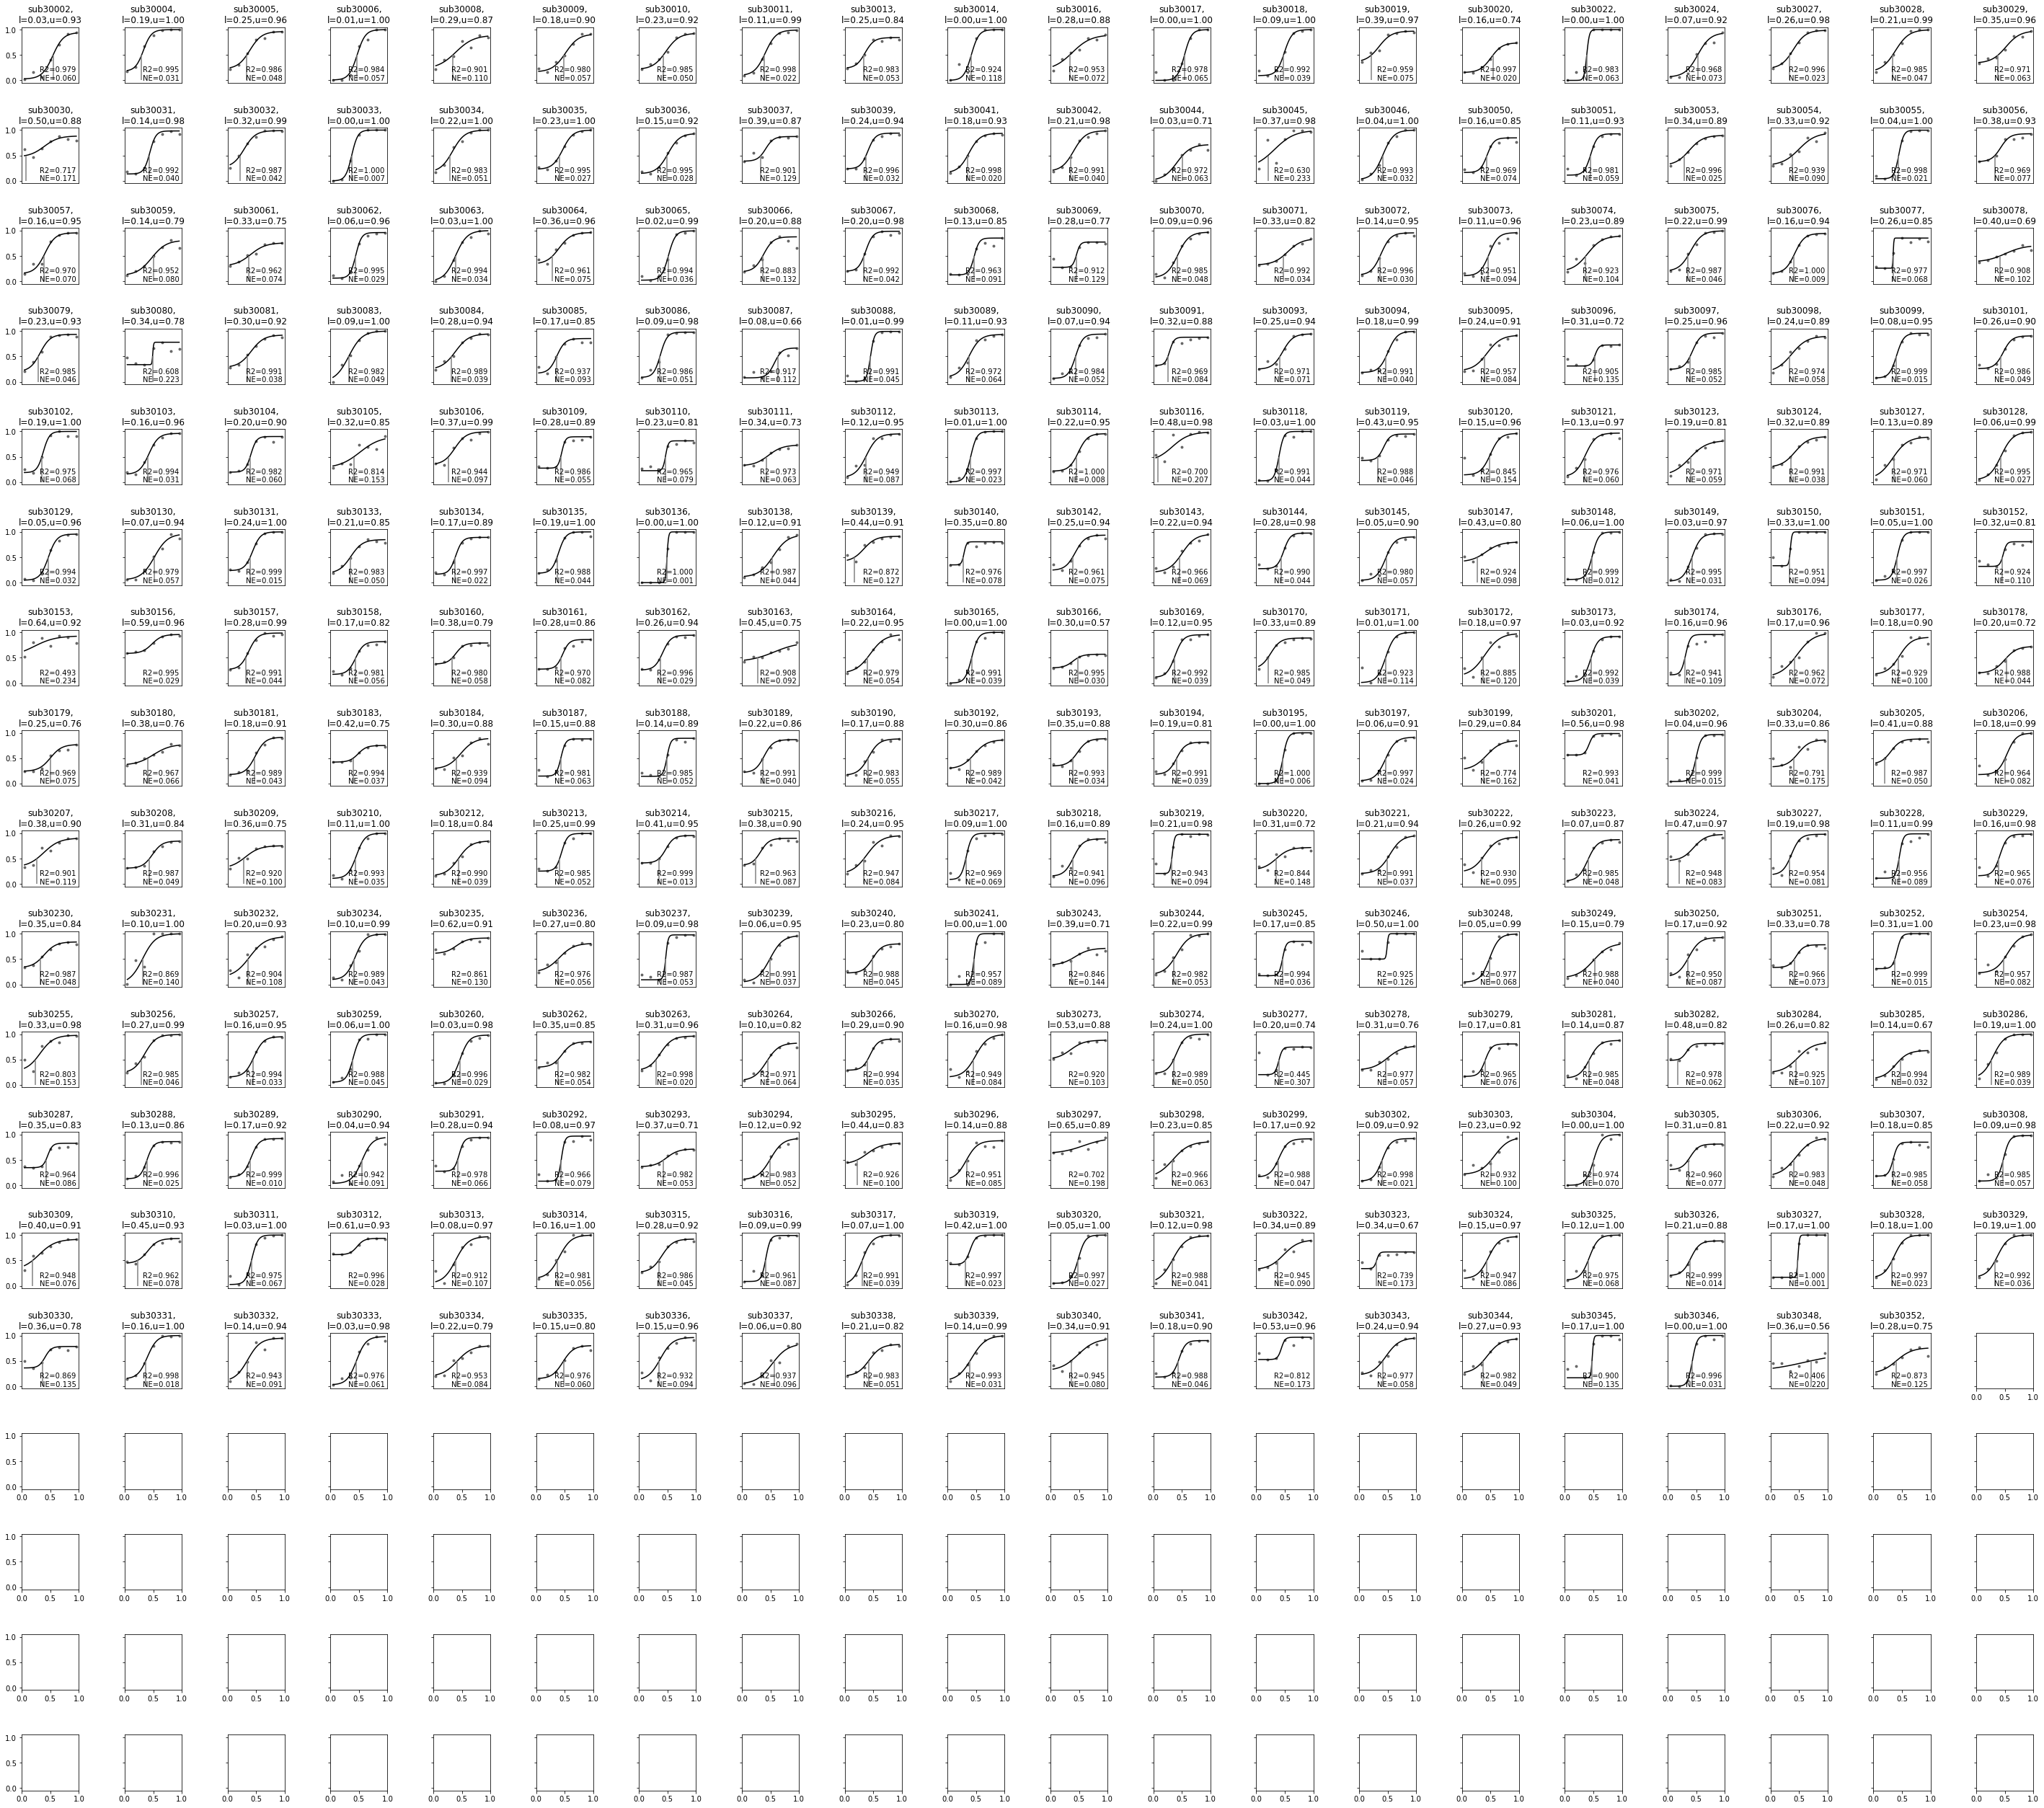

In [13]:
warnings.filterwarnings("ignore")
nrows = 18
ncols = 20
jitter_strength = .01
fig, axs  = plt.subplots(figsize = (50,45), nrows=nrows, ncols = ncols, sharey = True, sharex = False)
best_fit_params = []
subID = []
for isub,subID in enumerate(subs):
    df_params['subID'][isub] = subID #isub + 1
    if isub%50 == 0:
        print('isub:',isub, ', subID:', subID)
    ax = plt.subplot(nrows, ncols, isub+1)
    
    xfit = (180 - df_mean.loc[df_mean['subID'] == subID, 'subtlety'].values) / 180
    yfit = df_mean.loc[df_mean['subID'] == subID, 'responses_subt_1'].values / 100

    x = np.array(xfit)
    y = np.array(yfit)

    flipped = False
    if y[x == 0] - y[x == 1] > .001: # flipped subs
        flipped =  True
        x = np.flip(x)
        print('flipped', subID)

    # try:
    results = fit_sigmoid(x, y, rescale=True, padding=False, n_rep=nRep, param_bounds=param_bounds,
                param_details=f"{rootfile_data}/sub%d_1k_subt.csv"%(subID))
    best_params, goodness_of_fit, other_params = results

    ss_res, df_params['nrmse'][isub], df_params['r_squared'][isub],df_params['aic'][isub] = goodness_of_fit
    
    if flipped == False:
        df_params['center'][isub], df_params['sigma'][isub], df_params['bias_lower'][isub], df_params['bias_upper'][isub] = best_params
        df_params['center_y'][isub], df_params['obj_center'][isub], df_params['bias_xmin'][isub], df_params['bias_xmax'][isub] = other_params
    else: # fightiness DEcreases with chargespeed (unexpected)
        print('flipped')
        df_params['center'][isub], df_params['sigma'][isub], df_params['bias_upper'][isub], df_params['bias_lower'][isub] = best_params
        df_params['center_y'][isub], df_params['obj_center'][isub], df_params['bias_xmax'][isub], df_params['bias_xmin'][isub] = other_params
        df_params['bias_upper'][isub] = 1 - df_params['bias_upper'][isub]
        df_params['bias_lower'][isub] = 1 - df_params['bias_lower'][isub]
        df_params['bias_xmax'][isub] = 1 - df_params['bias_xmax'][isub]
        df_params['bias_xmin'][isub] = 1 - df_params['bias_xmin'][isub]
        # e.g. if the curve goes from .8 to .2, bias_xmin should be 0.8. flipped curve will give bias_xmax as 0.2 
        # (on the flipped version of the true curve) which when flipped (i.e., assigned to bias_xmin) and then subtracted from 1 gives us a bias_xmin of 0.8
    
    df_params['flipped'][isub] = flipped

    if np.isnan(df_params['obj_center'][isub]): # bug - THIS ASSIGNS NOTHING TO THE DF!!
        if (df_params['bias_xmin'][isub] >= 0.5) & (df_params['bias_xmax'][isub] <= 0.5):
            obj_center = 0 if flipped == False else 1
        elif (df_params['bias_xmax'][isub] >= 0.5) & (df_params['bias_xmin'][isub] <= 0.5):
            obj_center = 1 if flipped == False else 0
    
    plot_curve_fit(ax, x, y, best_params, color='black', text_loc=(0.3, 0))

    ax.vlines(df_params['obj_center'][isub],0,.5,color='grey')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # ax.set_xticks(np.arange(0,1.1,.2))
    if flipped:
        ax.invert_xaxis()
        df_params['center_y'][isub] = 1-df_params['center_y'][isub] # do this ONLY AFTER plotting
        df_params['obj_center'][isub] = 1-df_params['obj_center'][isub]
    ax.set_title(f"sub{subID},\nl={df_params['bias_xmin'][isub]:.2f},u={1-df_params['bias_xmax'][isub]:.2f}")
    ax.set_xticks([])
    # except:
    #     print('bad', subID)
    #     continue

    # break

plt.subplots_adjust(wspace=0.8, hspace=0.8)
plt.savefig('../results/subtlety_playfight_mixed/curvefit_subtlety_mixed.png')
df_params[['subID', 'r_squared', 'nrmse', 'aic', 'center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax', 'bias_lower', 'bias_upper','flipped']].to_csv(f'{rootfile_data}/all_params_1k_subt_mixed.csv', index = False)

In [ ]:
df_params.sort_values(by=['r_squared']).head()

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
178,26198.0,-0.513648,0.424820,0.671953,1.0,0.003,0.000,0.5015,0.665934,0.340046,0.417460
290,26317.0,-0.400278,0.403457,0.146622,1.0,0.029,0.744,0.1425,NaN,0.134194,0.811811
138,26154.0,-0.337424,0.345882,1.332020,1.0,0.073,0.632,0.2205,NaN,0.134604,0.803764
217,26242.0,-0.321875,0.381287,0.446003,1.0,0.468,0.369,0.5495,NaN,0.531621,0.428485
240,26265.0,-0.318933,0.432352,1.179761,1.0,0.446,0.335,0.5555,0.062800,0.497486,0.454315


In [ ]:
df_params.sort_values(by=['r_squared'])

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
178,26198.0,-0.513648,0.424820,0.671953,1.000000,0.003,0.000,0.5015,0.665935,3.400456e-01,0.417460
290,26317.0,-0.400278,0.403457,0.146622,1.000000,0.029,0.744,0.1425,1.000000,1.341941e-01,0.811811
138,26154.0,-0.337424,0.345882,1.332020,1.000000,0.073,0.632,0.2205,1.000000,1.346035e-01,0.803764
217,26242.0,-0.321875,0.381287,0.446003,1.000000,0.468,0.369,0.5495,0.000000,5.316208e-01,0.428485
240,26265.0,-0.318933,0.432352,1.179761,1.000000,0.446,0.335,0.5555,0.062800,4.974858e-01,0.454316
...,...,...,...,...,...,...,...,...,...,...,...
24,26026.0,0.995283,0.028122,0.308653,0.104647,0.075,0.120,0.4775,0.320365,1.150578e-01,0.121087
10,26012.0,0.996383,0.025897,0.692898,0.067694,0.000,0.300,0.3500,0.754926,2.510406e-05,0.307417
234,26259.0,0.997195,0.023158,0.452252,0.057435,0.008,0.000,0.5040,0.451326,8.377272e-03,0.000072
75,26085.0,0.999992,0.001460,0.363988,0.022314,0.000,0.500,0.2500,1.000000,4.118124e-08,0.500000


In [ ]:
df_params.loc[df_params['r_squared']<0,:]

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
4,26005.0,-0.271219,0.342287,0.551178,1.0,0.285,0.578000,0.353500,1.000000,0.335086,0.631381
51,26059.0,-0.213889,0.347389,0.526816,1.0,0.190,0.655000,0.267500,1.000000,0.247545,0.714499
138,26154.0,-0.337424,0.345882,1.332020,1.0,0.073,0.632000,0.220500,1.000000,0.134604,0.803764
169,26189.0,-0.044954,0.316153,0.602975,1.0,0.245,0.476000,0.384500,1.000000,0.343672,0.588166
178,26198.0,-0.513648,0.424820,0.671953,1.0,0.003,0.000000,0.501500,0.665935,0.340046,0.417460
217,26242.0,-0.321875,0.381287,0.446003,1.0,0.468,0.369000,0.549500,0.000000,0.531621,0.428485
223,26248.0,-0.054295,0.284692,0.629077,1.0,0.225,0.666250,0.279375,1.000000,0.262815,0.710655
240,26265.0,-0.318933,0.432352,1.179761,1.0,0.446,0.335000,0.555500,0.062800,0.497486,0.454316
270,26296.0,-0.123804,0.373582,0.475171,1.0,0.432,0.461111,0.485444,1.000000,0.472980,0.500844
290,26317.0,-0.400278,0.403457,0.146622,1.0,0.029,0.744000,0.142500,1.000000,0.134194,0.811811


In [ ]:
df_corr = df_params[['r_squared','sigma','center','obj_center','bias_xmax','bias_xmin']].corr()
df_corr

,r_squared,sigma,center,obj_center,bias_xmax,bias_xmin
r_squared,1.000000,-0.932076,-0.351176,-0.344049,-0.496990,-0.425394
sigma,-0.932076,1.000000,0.372900,0.349787,0.446517,0.390681
center,-0.351176,0.372900,1.000000,0.491963,0.273130,-0.044330
obj_center,-0.344049,0.349787,0.491963,1.000000,0.726148,-0.072470
bias_xmax,-0.496990,0.446517,0.273130,0.726148,1.000000,0.300418
bias_xmin,-0.425394,0.390681,-0.044330,-0.072470,0.300418,1.000000


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'with bad fits too!')

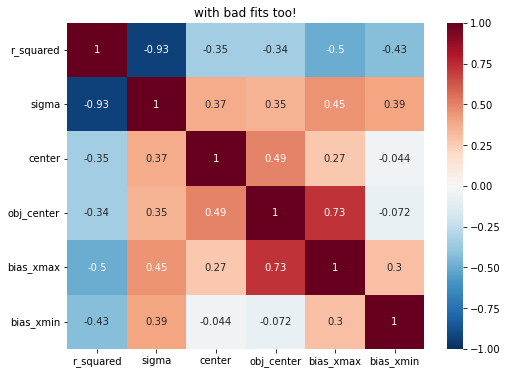

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(df_corr,cmap='RdBu_r',vmin=-1,vmax=1,annot=True)
plt.yticks(rotation = 0)
plt.title('with bad fits too!')

<AxesSubplot:xlabel='sigma', ylabel='r_squared'>

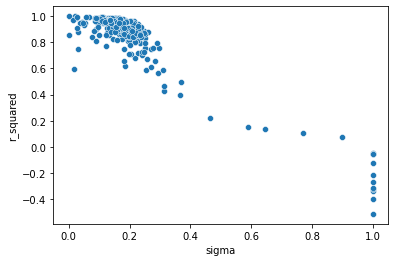

In [ ]:
sns.scatterplot(data = df_params,x = 'sigma', y ='r_squared')

In [ ]:
df_clean = df_params.loc[df_params['r_squared']>=.8,:]
df_clean.shape

(269, 11)

In [27]:
df_clean.loc[np.isinf(df_clean['obj_center']),:]

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax


In [28]:
obj_center = []
for i,row in df_clean.iterrows():
    if np.isinf(row['obj_center']):
        if np.round(row['bias_xmax'],4) <= .5:
            obj_center.append(1)
        elif np.round(row['bias_xmin'],4) >= .5:
            obj_center.append(0)
    else:
        obj_center.append(row['obj_center'])
df_clean['obj_center'] = obj_center

In [29]:
df_clean = df_clean.loc[~np.isinf(df_clean['obj_center']),:]
df_clean.shape

(269, 11)

In [30]:
df_corr = df_clean[['r_squared','sigma','center','obj_center','bias_xmax','bias_xmin']].corr()
df_corr

,r_squared,sigma,center,obj_center,bias_xmax,bias_xmin
r_squared,1.000000,-0.400929,-0.017754,-0.121227,-0.215882,-0.375940
sigma,-0.400929,1.000000,0.263532,0.138017,0.066750,0.255132
center,-0.017754,0.263532,1.000000,0.613086,0.179023,-0.239330
obj_center,-0.121227,0.138017,0.613086,1.000000,0.695785,-0.193919
bias_xmax,-0.215882,0.066750,0.179023,0.695785,1.000000,0.241933
bias_xmin,-0.375940,0.255132,-0.239330,-0.193919,0.241933,1.000000


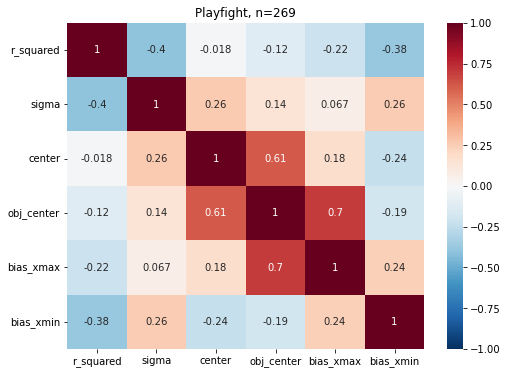

In [31]:
plt.figure(figsize = (8,6))
sns.heatmap(df_corr,cmap='RdBu_r',vmin=-1,vmax=1,annot=True)
plt.title(f'Playfight, n={df_clean.shape[0]}')
plt.yticks(rotation = 0)
plt.savefig('../results/covariance_matrix_curvefit.png')

<AxesSubplot:xlabel='sigma', ylabel='r_squared'>

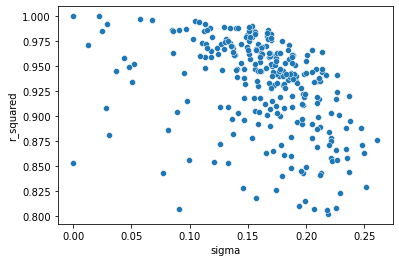

In [32]:
sns.scatterplot(data = df_clean,x = 'sigma', y ='r_squared')

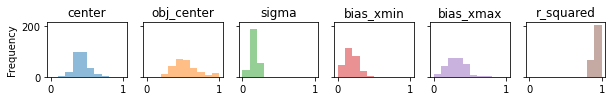

In [33]:
plot_curve_param = ['center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax', 'r_squared']
df_clean[plot_curve_param].plot(kind='hist', bins=10, subplots=True, sharex=False, sharey=True, layout=(1,len(plot_curve_param)), legend=False, title=plot_curve_param, figsize=(10,1), alpha=0.5)
plt.savefig('../results/curvefit_histograms.png', bbox_inches="tight" )

In [36]:
from scipy import stats

0.24193314418091127 6.091446676500081e-05


Text(0.1, 0.9, 'r=0.24 (p < .001)')

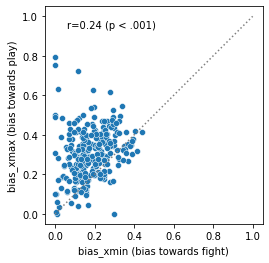

In [38]:
sns.scatterplot(data = df_clean, x = 'bias_xmin',y = 'bias_xmax')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0,1],[0,1], color ='grey',ls = ':')
plt.xlabel('bias_xmin (bias towards fight)')
plt.ylabel('bias_xmax (bias towards play)')
r,p = stats.pearsonr(df_clean['bias_xmin'], df_clean['bias_xmax'])
print(r,p)
plt.gca().annotate(f'r={r:.2f} (p < .001)',xy = (0.1,.9),xycoords = 'axes fraction')

<AxesSubplot:>

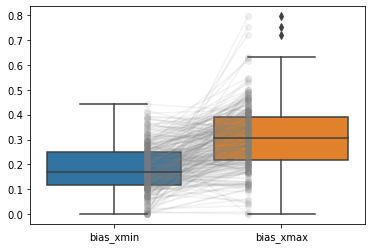

In [39]:
for _, row in df_clean.iterrows():
    plt.plot([0.2, .8], [row['bias_xmin'], row['bias_xmax']], '-o', color='grey', alpha = .1)
sns.boxplot(data = df_clean[['bias_xmin','bias_xmax']])

In [40]:
from scipy import stats

In [41]:
(df_clean['bias_xmax'] - df_clean['bias_xmin']).mean()

0.12606897272032674

In [42]:
stats.ttest_rel(df_clean['bias_xmin'],df_clean['bias_xmax'])

Ttest_relResult(statistic=-14.793591646302325, pvalue=1.312835566271599e-36)

In [43]:
df_clean['center'].describe()

count    269.000000
mean       0.419375
std        0.104761
min        0.000100
25%        0.355657
50%        0.416549
75%        0.479684
max        0.772257
Name: center, dtype: float64

In [44]:
from pymer4.models import Lmer,Lm
from pymer4.stats import vif

In [45]:
def vif_info(model):
    design_matrix_df = model.design_matrix
    #design_matrix_df.shape
    # print('model:', model.formula)
    vif_keys= list(vif(design_matrix_df)[1].keys())
    vif_values= list(vif(design_matrix_df)[1].values())
    print('VIF: ',','.join([vif_keys[i] + ': ' + str(np.round(vif_values[i],2)) for i in range(len(vif_keys))]))
    # print('AIC: ', model.AIC)

In [46]:
model = Lm('subID ~ center + sigma  + bias_xmin  + bias_xmax' , data=df_params) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  center: 1.26,sigma: 1.57,bias_xmin: 1.29,bias_xmax: 1.32


In [47]:
rows = ~np.isnan(df_params['obj_center']) & ~np.isinf(df_params['obj_center'])
model = Lm('subID ~ center + sigma  + bias_xmin  + bias_xmax' , data=df_params.loc[rows,:]) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  center: 1.26,sigma: 1.57,bias_xmin: 1.29,bias_xmax: 1.32


In [48]:
rows = ~np.isnan(df_params['obj_center']) & ~np.isinf(df_params['obj_center'])
model = Lm('subID ~ obj_center + sigma  + bias_xmin  + bias_xmax' , data=df_params.loc[rows,:]) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  obj_center: 2.74,sigma: 1.43,bias_xmin: 1.56,bias_xmax: 2.9


In [ ]:
X

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cf_params_1 = ["sigma","center", "bias_xmax", "bias_xmin"]
X = df_params[cf_params_1]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = X.reset_index()
# X.drop(columns=['index'],inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0      index   3.526623
1      sigma   5.310976
2     center   9.753847
3  bias_xmax  10.472256
4  bias_xmin   6.942190


In [111]:
X.drop(columns=['index'],inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0      sigma   5.310876
1     center   8.778918
2  bias_xmax  10.376944
3  bias_xmin   6.817238


In [124]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [112]:
from pymer4.stats import vif
vif(X,has_intercept=False)

({},
 {'sigma': 1.761860767424135,
  'center': 1.4481021328207617,
  'bias_xmax': 1.3359210419614593,
  'bias_xmin': 1.6410180332850042})

In [73]:
cf_params_1 = ["sigma","obj_center", "bias_xmax", "bias_xmin"]
X = df_params[cf_params_1]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0       sigma   6.056342
1  obj_center  12.386012
2   bias_xmax  16.796136
3   bias_xmin   8.257309


In [76]:
X.columns

Index(['sigma', 'obj_center', 'bias_xmax', 'bias_xmin'], dtype='object')

In [75]:
i = X.columns[0]
i

'sigma'

In [78]:
X.values.shape

(289, 4)

In [96]:
# Assuming X is your design matrix
if isinstance(X, pd.DataFrame):
    features = X.columns
else:
    features = range(X.shape[1])

VIFs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

for feature, vif in zip(features, VIFs):
    print(f"VIF for {feature}: {vif}")


VIF for sigma: 5.310876132164404
VIF for center: 8.778917662271116
VIF for bias_xmax: 10.376943546437964
VIF for bias_xmin: 6.817237590004739


In [84]:
# from pymer4.stats import vif

# vif(X,has_intercept=False)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})

In [83]:

# vif(X,has_intercept=False, exclude_intercept=False)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})

In [87]:

# vif(X,has_intercept=False, exclude_intercept=True)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})